In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which p arts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

from IPython.display import clear_output

import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

import random

import time
import shutil
import uuid
from shutil import copyfile
from collections import Counter

import json

from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.pyplot import figure

In [2]:
def read_all(paths):
    lines=[]
    for path in paths:
#         print( 'reading ', path)
        with open(path) as f:
            newlines = f.readlines()
#             print( path, len(newlines))
#             epochs.append( (len(newlines), path, newlines))
            lines.extend( newlines)
    return lines

In [3]:
files = glob( os.path.join( 'C:/mestrado/repos-github/chess-attention/train-folder/log', 'train_icpr2022_reply_reference_*.txt'))
print( len( files))

5


In [4]:
for f in files:
    print( Path( f).name)

train_icpr2022_reply_reference_1000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_2000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_3000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_4000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_5000---8linhas-handwritten--5k.txt


In [5]:
def fname2qtd( fname):
    print( fname)
    return fname.\
        replace('train_icpr2022_reply_reference_', '').\
        replace( '---8linhas-handwritten--5k.txt', '')

def collect( f):
    lines = read_all([f])
    logs = [json.loads( line) for line in lines]
    
    r = {
        'train_loss': [log['train_loss'] for log in logs],
        'valid_loss': [log['valid_loss'] for log in logs],
        'train_acc': [log['train_acc'] for log in logs],
        'valid_acc': [log['valid_acc'] for log in logs],
        'test_acc': [log['test_acc'][0][0][-1] for log in logs],
        'test_acc0': [log['test_acc'][0][0][0] for log in logs],
    }
    return r

logs = []
for f in files:
    logs.append( (fname2qtd( Path( f).name), collect( f)))
    
logs = sorted( logs, key=lambda x: int( x[0]), reverse=True)

train_icpr2022_reply_reference_1000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_2000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_3000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_4000---8linhas-handwritten--5k.txt
train_icpr2022_reply_reference_5000---8linhas-handwritten--5k.txt


In [6]:
for x in logs:
    print( x[0])

5000
4000
3000
2000
1000


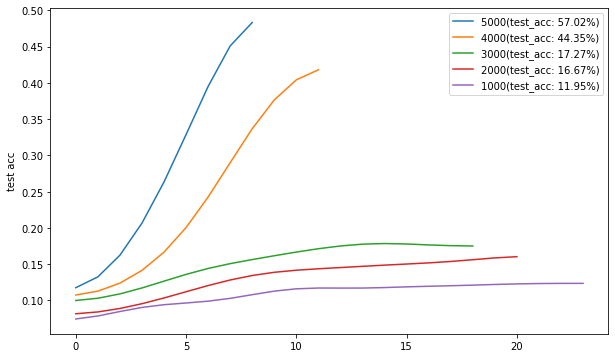

In [15]:
figure(figsize=(10, 6))
legends = []
for qtd, log in logs:
    plt.plot( gaussian_filter1d(log['test_acc'], sigma=2))
    legends.append( "{}(test_acc: {:.2f}%)".format( qtd, log['test_acc'][-1]*100))
plt.ylabel( 'test acc')
plt.gca().legend( legends)
plt.show()

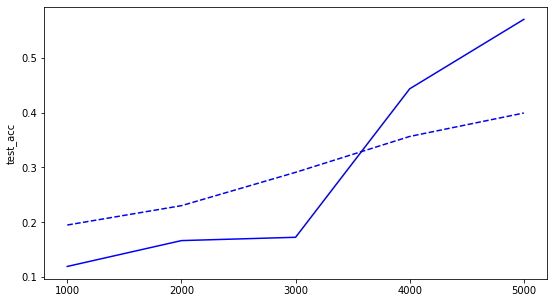

In [8]:
figure(figsize=(9, 5))
test_acc = [log['test_acc'][-1] for (qtd, log) in logs]
qtd = [qtd for (qtd, log) in logs]
test_acc.reverse()
qtd.reverse()

plt.plot(qtd, gaussian_filter1d(test_acc, sigma=2), '--', color='blue')
plt.plot(qtd, test_acc,color='blue')

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('test_acc')
# plt.gca().legend(
#     ('test_acc')
# )
plt.show()


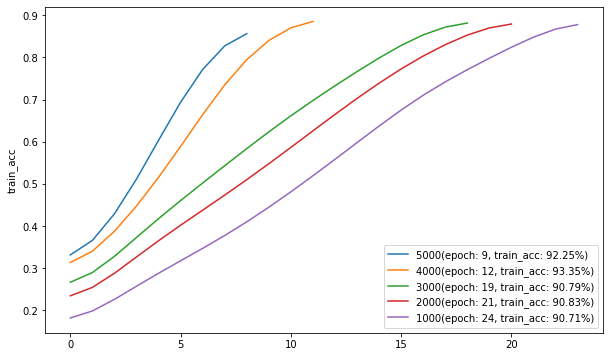

In [9]:
figure(figsize=(10, 6))
legends = []
for qtd, log in logs:
    plt.plot( gaussian_filter1d(log['train_acc'], sigma=2))
    legends.append( "{}(epoch: {}, train_acc: {:.2f}%)".format( qtd, len( log['train_acc']),log['train_acc'][-1]*100))
plt.ylabel( 'train_acc')
plt.gca().legend( legends)
plt.show()

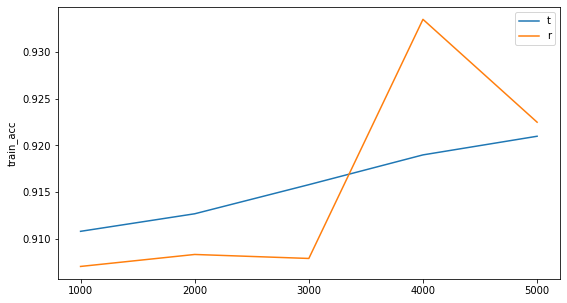

In [10]:
figure(figsize=(9, 5))
train_acc = [log['train_acc'][-1] for (qtd, log) in logs]
qtd = [qtd for (qtd, log) in logs]
train_acc.reverse()
qtd.reverse()

plt.plot(qtd, gaussian_filter1d(train_acc, sigma=2))
plt.plot(qtd, train_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('train_acc')
plt.gca().legend(
    ('train_acc')
)
plt.show()

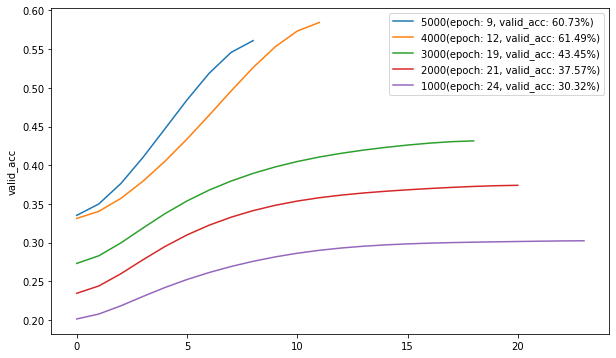

In [11]:
figure(figsize=(10, 6))
legends = []
for qtd, log in logs:
    plt.plot( gaussian_filter1d(log['valid_acc'], sigma=2))
    legends.append( "{}(epoch: {}, valid_acc: {:.2f}%)".format( qtd, len( log['valid_acc']),log['valid_acc'][-1]*100))
plt.ylabel( 'valid_acc')
plt.gca().legend( legends)
plt.show()

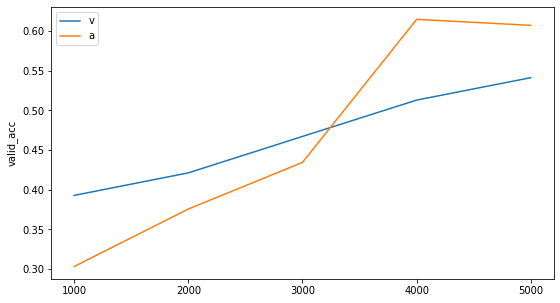

In [12]:
figure(figsize=(9, 5))
valid_acc = [log['valid_acc'][-1] for (qtd, log) in logs]
qtd = [qtd for (qtd, log) in logs]
valid_acc.reverse()
qtd.reverse()

plt.plot(qtd, gaussian_filter1d(valid_acc, sigma=2))
plt.plot(qtd, valid_acc)

# plt.xlabel('Tamanho da sequência considerada')
plt.ylabel('valid_acc')
plt.gca().legend(
    ('valid_acc')
)
plt.show()

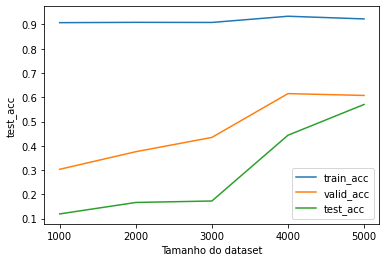

In [17]:
# figure(figsize=(12, 8))
qtd = [qtd for (qtd, log) in logs]
qtd.reverse()

plt.plot(qtd, train_acc )
plt.plot(qtd, valid_acc)
plt.plot(qtd, test_acc)
# plt.plot(qtd, gaussian_filter1d(train_acc, sigma=2), '--')
# plt.plot(qtd, gaussian_filter1d(valid_acc, sigma=2), '--')
# plt.plot(qtd, gaussian_filter1d(test_acc, sigma=2), '--')

plt.xlabel('Tamanho do dataset')
plt.ylabel('test_acc')
plt.gca().legend(
    ['train_acc', 'valid_acc', 'test_acc']
)
plt.show()


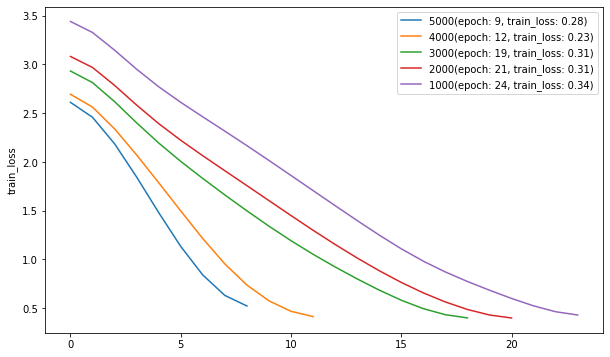

In [14]:
figure(figsize=(10, 6))
legends = []
for qtd, log in logs:
    plt.plot( gaussian_filter1d(log['train_loss'], sigma=2))
    legends.append( "{}(epoch: {}, train_loss: {:.2f})".format( qtd, len( log['train_loss']),log['train_loss'][-1]))
plt.ylabel( 'train_loss')
plt.gca().legend( legends)
plt.show()